In [250]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import imageio as im
from skimage import data, io, transform

In [251]:
def histVisualization(x, y, gray_source_im, gray_target_im, newWidth, newHeight):
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(311)
    plt.title("Vstupny vyrez")
    plt.imshow(gray_source_im[x:(newWidth + x), y:(newHeight + y)], cmap="gray")

    plt.subplot(312)
    plt.title("Povodny histogram vstupneho vyrezu")
    plt.hist(gray_source_im[x:(newWidth + x), y:(newHeight + y)].ravel(), bins=50, color='#0504aa')

    plt.subplot(313)
    plt.title("Cielovy histogram vyrezu")
    plt.hist(gray_target_im[x:(newWidth + x), y:(newHeight + y)].ravel(), bins=50, color='#0504aa')


In [252]:

def adap_hist_matching(source_im, target_im, D):

    source_width = int(source_im.shape[1])
    souce_height = int(source_im.shape[0])

    target_width = int(source_im.shape[1])
    target_height = int(source_im.shape[0])

    if (source_width == target_width and souce_height == target_height):
        newWidth = source_width // D
        newHeight = souce_height // D
    else:
        target_im = transform.resize(target_im, (souce_height, source_width))
        newWidth = source_width // D
        newHeight = souce_height // D

    gray_source_im = (rgb2gray(source_im))
    gray_target_im = (rgb2gray(target_im))

    x, y = 0, 0

    for i in range(0, D):
        for j in range(0, D):
                
            source_values, source_unique_indices, source_counts = np.unique(gray_source_im[x:(newWidth + x), y:(newHeight + y)].ravel(), return_inverse=True, return_counts=True)
            target_values, target_counts = np.unique(gray_target_im[x:(newWidth + x), y:(newHeight + y)].ravel(), return_counts=True)

            source_quantiles = np.cumsum(source_counts) / gray_source_im[x:(newWidth + x), y:(newHeight + y)].size
            target_quantiles = np.cumsum(target_counts) / gray_target_im[x:(newWidth + x), y:(newHeight + y)].size

            interpolation_values = np.interp(source_quantiles, target_quantiles, target_values)
            gray_source_im[x:(newWidth + x), y:(newHeight + y)] = interpolation_values[source_unique_indices].reshape(gray_source_im[x:(newWidth + x), y:(newHeight + y)].shape)
            
            if (i == 1 and j == 0):
                histVisualization(x, y, gray_source_im, gray_target_im, newWidth, newHeight)
                
            y = y + int(newHeight)
        x = x + int(newWidth)
        y = 0

    return gray_source_im



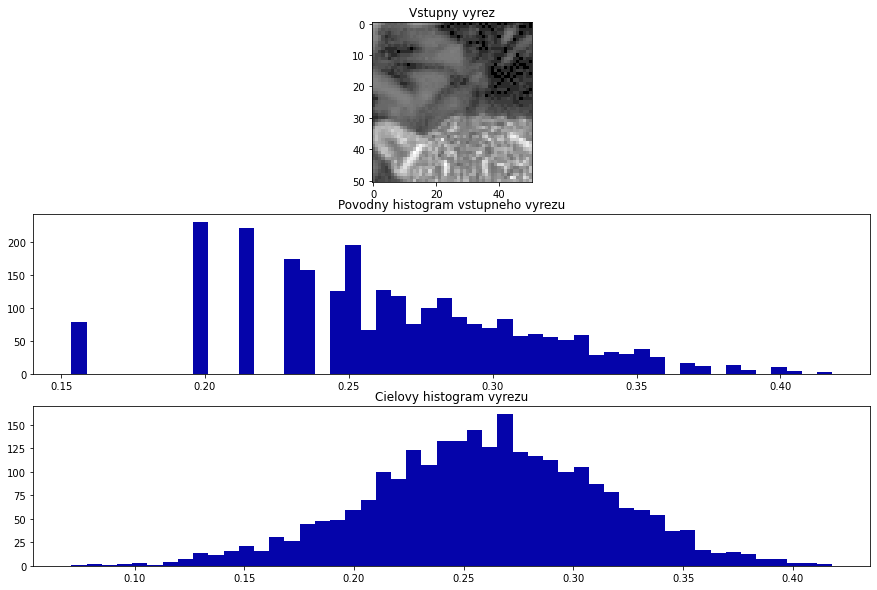

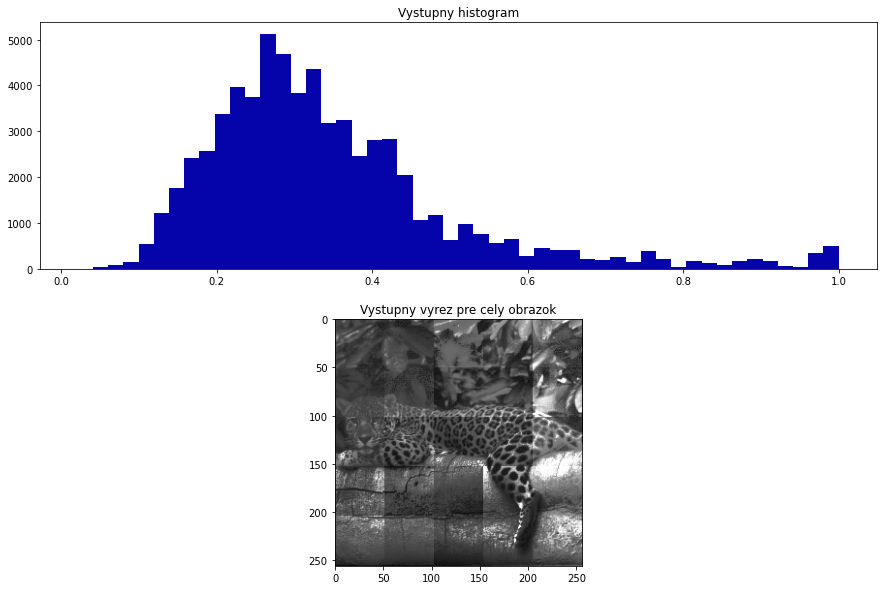

In [253]:
source_im = im.imread("imgs/jaguar.gif")
target_im = im.imread("imgs/TUKE_aerial.png")
D = 5

final_im = adap_hist_matching(source_im,target_im,D)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Vystupny histogram")
plt.hist(final_im.ravel(), bins=50, color='#0504aa')

plt.subplot(212)
plt.title("Vystupny vyrez pre cely obrazok")
plt.imshow(final_im, cmap="gray")